## Data expoloration on various datasets

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [5]:
def tokenizer(text):
    return text.split() if text != None else[]

In [16]:
from wordcloud import WordCloud

def wordcloud(counter):
    wc = WordCloud(width=1200,height=800,background_color="white",max_words=200)
    wc.generate_from_frequencies(counter)

    fig = plt.figure(figsize=(6,4))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

## GLOSBE DICTIONARY WORDS SENTENCES EXTRACT

In [37]:
gdws = pd.read_excel('glosbe_dictionary_words_sentences_extract.xlsx')
gdws.head()

,english_word,twi_translation,some_english_phrases,some_twi_phrases
0,frustration,N/F,|['Perhaps you too find yourself in a situatio...,|['Ebia na wo nso wowɔ tebea bi a ɛte sɛ nea ɛ...
1,experimental,N/F,|['Their leader’s opulence and the sexual expe...,|['Wɔn kannifo no ade dodowpɛ ne nna mu nkitah...
2,royal,N/F,|['Whether they were from the royal line or no...,"|['Sɛ na wɔyɛ adehye anaa wɔnyɛ no, ntease wom..."
3,riot,ahum,|['And he was in and out of jails for gang fig...,|['Na odii afiase akɔneaba wɔ basabasayɛfo ntɔ...
4,elsewhere,N/F,|['13 After hearing a talk at a circuit assemb...,|['13 Bere a onua bi ne ne nuabea tiee ɔkasa b...


In [38]:
gdws['some_twi_phrases'][0]

"|['Ebia na wo nso wowɔ tebea bi a ɛte sɛ nea ɛyɛ abasamtu—anaasɛ ɛyɛ nhyɛso mpo mu.', 'Na ofi ase su wɔ ne kasa biara mfinimfini, esiane sɛ na ontumi nwie ne kasa no na ɛyɛ no ahomete nti.', 'Nokwarem no, wobɛpɛ sɛ woka wo suahu no kyerɛ obiara, nanso sɛ wɔn nyinaa ani nnye ho a, mma w’abam mmmu.', 'Woyɛ aberante anaa ababaa a, dɛn na wobɛyɛ na wo bo amfuw w’awofo denneennen?', 'Ɔtee nka sɛ n’asetra nni atirimpɔw na wahaw enti ɔtwee ne ho fii ne mfɛfo no ho.', 'Ɛnyɛ nwonwa sɛ mpɛn pii no, ohia de adwenemhaw ne abasamtu ba!', 'Nkuranhyɛsɛm a wobefi komam aka akyerɛ wɔn a wɔn mfe akɔ anim no betumi aboa wɔn ma wɔanya ‘biribi a ɛbɛma wɔn ani agye’ wɔ ɔsom kronn a wɔde ma mu, na amma wɔamfa wɔn ho antoto nea Kristofo afoforo tumi yɛ anaa nea na wɔn ankasa tumi yɛ wɔ mmere bi a atwam no ho wɔ ɔkwan a ɛnsɛ so.—Galatifo 6:4.', 'Bere a mmɔden a yɛbɔ sɛ yɛbɛte nea bere kyerɛ ankasa ase ma yɛn abam bu no, wɔ nnipa pii fam no, adwene a ɛne sɛ yebenya daa nkwa anaasɛ yɛbɛtra ase daa no yɛ nea ɛyɛ

In [39]:
# Generate tokens on data
# Takes a while
gdws_tokens = gdws['some_twi_phrases'].map(tokenizer).sum()

In [40]:
#  Number of tokens
len(gdws_tokens)

2468961

In [41]:
# Counting individual words in tokens
#  Most common 20
gdws_counter = Counter(gdws_tokens)
gdws_counter.most_common(20)

[('a', 141711),
 ('no', 113786),
 ('na', 73194),
 ('sɛ', 68776),
 ('ne', 57634),
 ('mu', 41672),
 ('ho', 39598),
 ('wɔ', 36277),
 ('wɔn', 34957),
 ('so', 31548),
 ('no,', 28063),
 ('bi', 23450),
 ('ma', 16486),
 ('de', 15507),
 ('bere', 13753),
 ('yɛ', 13691),
 ('yɛn', 13528),
 ('a,', 11704),
 ('wɔde', 11413),
 ('nea', 11265)]

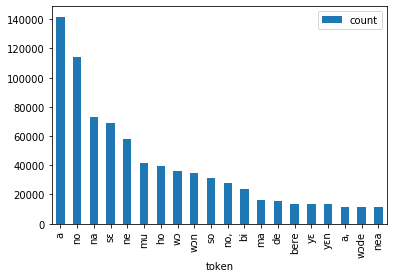

In [42]:
freq_asante = pd.DataFrame.from_records(gdws_counter.most_common(20),columns=['token','count'])
freq_asante.plot(kind = 'bar', x='token')

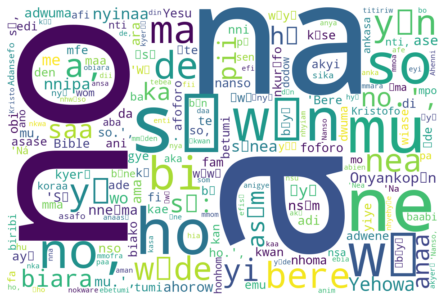

In [35]:
wordcloud(gdws_counter)

## GIDEONS INTERNATIONAL NEW TESTAMENT TWI

In [30]:
gint = pd.read_excel('gideons_interational_new_testament_twi.xlsx')
gint.head()

,bible_chapter,twi-text
0,Mateo 1,Yesu Kristo mpanimfoɔ\n1Yesu Kristo a ɔfiri Ɔh...
1,Mateo 2,Anyansafoɔ a wɔfiri apueeɛ no\n1Ɛberɛ a Ɔhene ...
2,Mateo 3,Yohane Osubɔni asɛnka\n1Ɛberɛ a Yesu ne nʼawof...
3,Mateo 4,"Ɔbonsam sɔ Yesu hwɛ\n1Yei akyi no, Honhom Kron..."
4,Mateo 5,"Nhyira Nsɛm\n1Ɔhunuu nnipakuo no saa no, ɔkɔɔ ..."


In [31]:
gint_tokens = gint['twi-text'].map(tokenizer).sum()

In [32]:
len(gint_tokens)

186305

In [44]:
# Counting individual words in tokens
#  Most common 20
gint_counter = Counter(gint_tokens)
gint_counter.most_common(20)

[('no', 10477),
 ('a', 7296),
 ('na', 6021),
 ('ne', 5086),
 ('sɛ', 4495),
 ('sɛ,', 3237),
 ('wɔn', 3086),
 ('mu', 2482),
 ('mo', 2284),
 ('no,', 2255),
 ('ho', 2240),
 ('so', 2022),
 ('wɔ', 1755),
 ('Onyankopɔn', 1701),
 ('me', 1530),
 ('Yesu', 1364),
 ('bi', 1195),
 ('a,', 1171),
 ('no.', 1147),
 ('deɛ', 1068)]

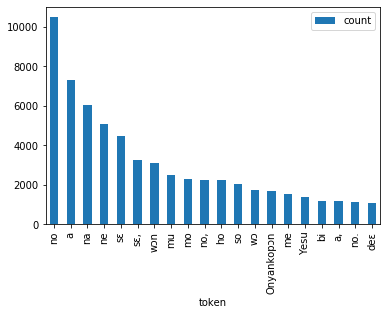

In [45]:
freq_asante = pd.DataFrame.from_records(gint_counter.most_common(20),columns=['token','count'])
freq_asante.plot(kind = 'bar', x='token')

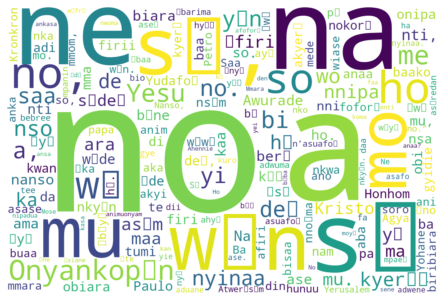

In [46]:
# World cloud
wordcloud(gint_counter)

## Manually generated dictionary data

In [48]:
mgdd = pd.read_excel('manually_generated_dictionary.xlsx')



,Akan,English
0,nipadua,the human body
1,honam akwaa,body parts
2,honam/wedeɛ,skin
3,nam,flesh
4,nwi,hair
...,...,...
78,hwoa,testicle
79,nufoɔ,breast
80,ɛtwɛ,vagina
81,ɛtwɛba,clitoris


In [52]:
#  Number of words in dictionary
len(mgdd['Akan'])

83

## NEW REVISED ASANTE TWI BIBLE

In [53]:
nrat = pd.read_excel('new_revised_asante_twi_bible.xlsx')
nrat.head()

,bible_chapter,twi-text
0,Gyenesis 2,Homeda\n1Na wɔwiee ɔsoro ne asase ne deɛ ɛwɔ m...
1,Gyenesis 3,Onipa asehweɛ\n1 Na ɔwɔ yɛ aniteɛ kyɛne wiram ...
2,Gyenesis 4,"Kain ne Habel\n1Na Adam ne ne yere Hawa daeɛ, ..."
3,Gyenesis 5,Adam awoɔ ntoatoasoɔ\n(1 Berɛsosɛm 1.1-4)\n1 A...
4,Gyenesis 6,Nnipa nnebɔne\n1 Na nnipa firii aseɛ redɔɔso w...


In [55]:
nrat_tokens = nrat['twi-text'].map(tokenizer).sum()

In [56]:
len(nrat_tokens)

695750

In [57]:
# Counting individual words in tokens
# Most common 20
nrat_counter = Counter(nrat_tokens)
nrat_counter.most_common(20)

[('na', 35670),
 ('no', 30393),
 ('ne', 26500),
 ('a', 17893),
 ('wɔn', 12460),
 ('sɛ', 12110),
 ('mu', 9056),
 ('Na', 7791),
 ('no,', 7573),
 ('me', 6997),
 ('ho', 6607),
 ('wo', 6434),
 ('so', 6351),
 ('sɛ:', 6130),
 ('AWURADE', 5902),
 ('mo', 4897),
 ('nyinaa', 4819),
 ('wɔ', 4390),
 ('deɛ', 3838),
 ('mu,', 3244)]

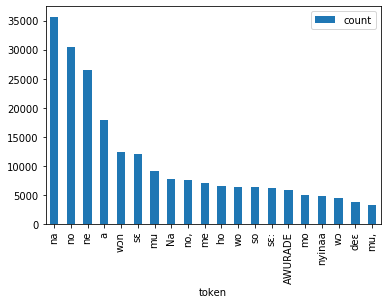

In [58]:
freq_asante = pd.DataFrame.from_records(nrat_counter.most_common(20),columns=['token','count'])
freq_asante.plot(kind = 'bar', x='token')

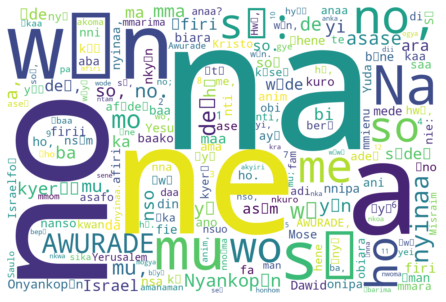

In [59]:
# Word cloud
wordcloud(nrat_counter)

## STOP WORDS EXTRACTION FROM GLOSBE

In [60]:
swef = pd.read_excel('stops_words_extraction_from_glosbe.xlsx')
swef.head()

,english_word,twi_translation,expand_eng,expand_twi
0,i,Ich liebe,"|['And lovingly said: “I want to.”', 'Not bein...","|['medɔ wo', 'Ɔkae sɛ: ‘Mepɛ na mɛyɛ.’', 'Esia..."
1,i,Ich liebe,"'“I used to sit there and never comment, thin...","'Bere bi a atwam no, mekɔ asafo nhyiam a na m..."
2,i,Ich liebe,'Even if the hope of everlasting life were no...,'Sɛ mpo daa nkwa ho anidaso nka akatua a Yeho...
3,i,Ich liebe,"'3 “I love the Father.”', 'Coincidentally, th...","'3 “Medɔ Agya no.”', 'Ɔkasa ne n’awerɛfiri, ɛ..."
4,i,Ich liebe,'“I have known some young ones who dated nonb...,Onua kumaa bi kae sɛ: “Minim mmerante ne mmaba...
